# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [1]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from tensorflow import keras
from sklearn.model_selection import train_test_split
import zipfile
import os
%matplotlib inline


Load the dataset.

In [2]:
# Load and unzip the dataset
zip_file_path = r'D:\Savitri\stats\NeuralNetwork\CNN\Assignment\data.zip'  # Replace with the actual path to your zip file
destination_directory = r'D:\Savitri\stats\NeuralNetwork\CNN\Assignment' # Replace with the desired extraction path

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(destination_directory)


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [3]:
import matplotlib.image as mpimg

image_dict = {}
#data_path = destination_directory + '/data/'
def plotImages(data_path):
    for i in os.listdir(data_path):         
      dir = data_path  + i
      image_list = []
      for j in os.listdir(dir):
          img_path = dir + '/' + j
          image_list.append(mpimg.imread(img_path))

      image_dict[i] = image_list
    return image_dict

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [4]:
data_path = destination_directory + '/data/'
images = plotImages(data_path)
print("----------"*10)
for imgs in images.keys():
    print("Key:", imgs)
    print("Number of images:", len(images[imgs]))
    print("----------"*10)

----------------------------------------------------------------------------------------------------
Key: Cardboard
Number of images: 540
----------------------------------------------------------------------------------------------------
Key: Food_Waste
Number of images: 1000
----------------------------------------------------------------------------------------------------
Key: Glass
Number of images: 750
----------------------------------------------------------------------------------------------------
Key: Metal
Number of images: 1000
----------------------------------------------------------------------------------------------------
Key: Other
Number of images: 1010
----------------------------------------------------------------------------------------------------
Key: Paper
Number of images: 1030
----------------------------------------------------------------------------------------------------
Key: Plastic
Number of images: 2295
----------------------------------------------

Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

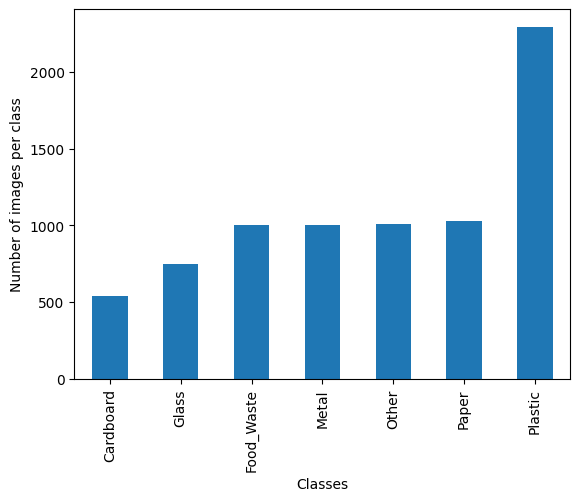

In [5]:
data_dic = {}
for imgs in images.keys():
    data_dic[imgs] = len(images[imgs])

data_df= pd.Series(data_dic)
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images per class')
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

In [6]:
# Visualise Sample Images (across different labels)

256 256


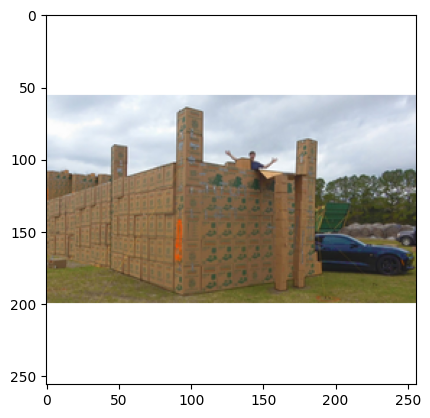

256 256


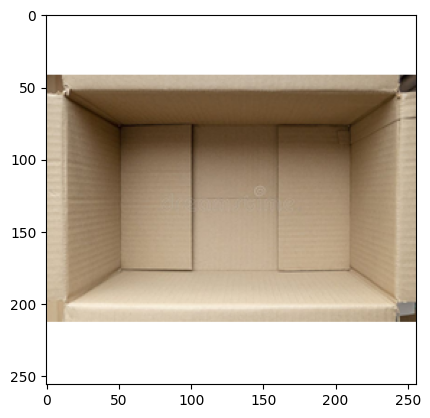

256 256


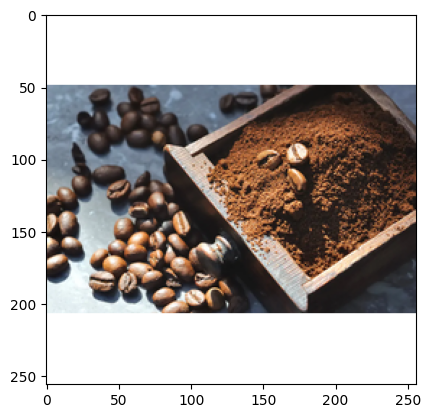

256 256


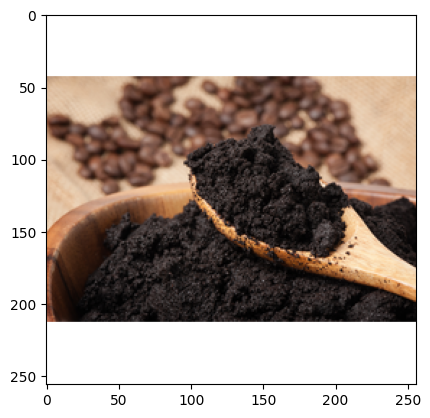

256 256


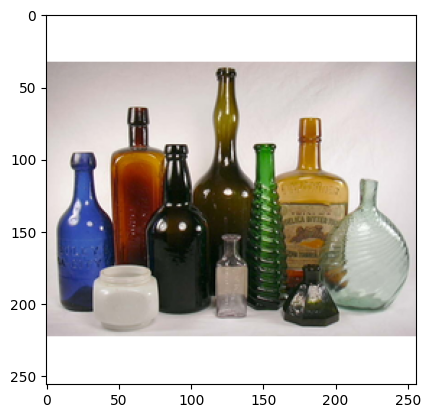

256 256


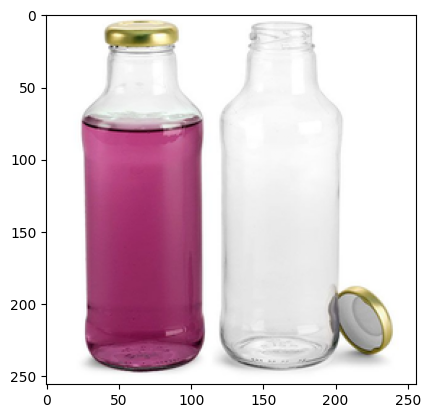

256 256


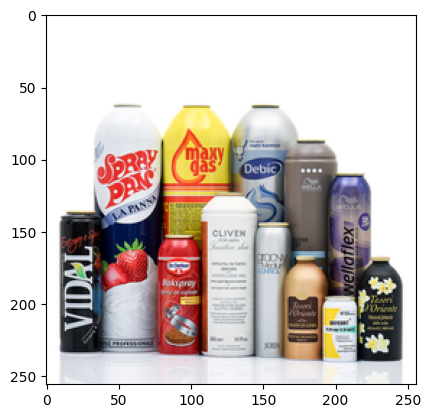

256 256


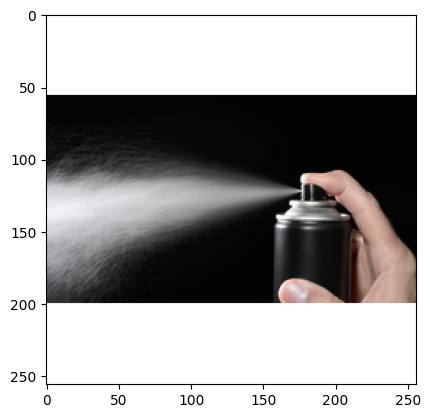

256 256


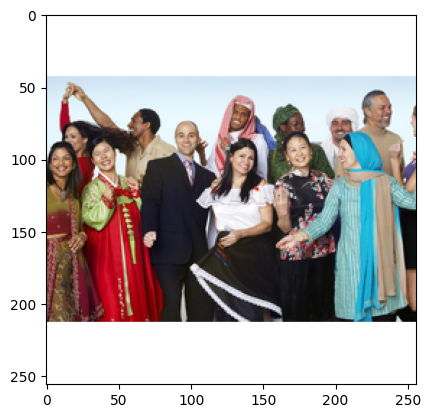

256 256


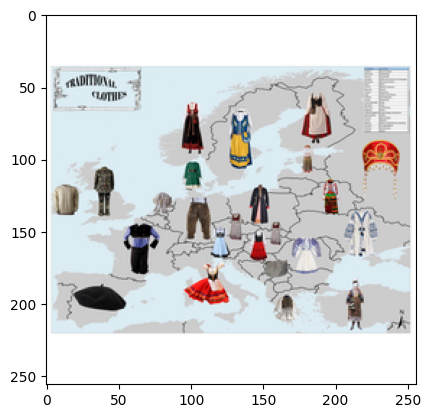

256 256


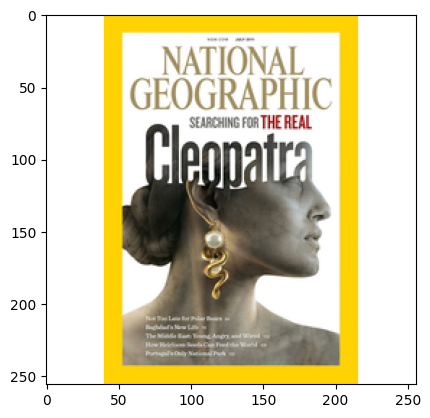

256 256


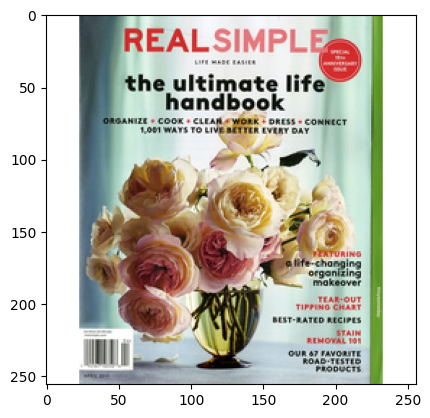

256 256


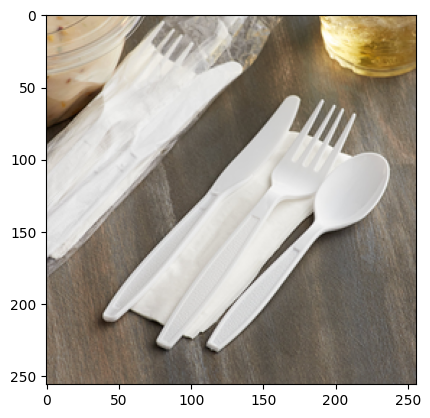

256 256


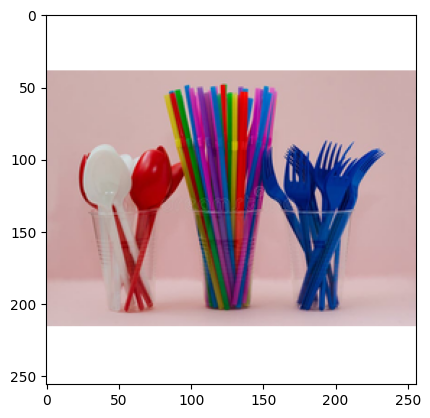

In [7]:
for imgs in images.values():
    count = 0
    for i in imgs:
      a, b = i.shape[:2]
      print(a,b)
      plt.imshow(i)
      plt.show()
      count = count + 1
      if count > 1:          
          break

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [8]:
# Find the smallest and largest image dimensions from the data set
import sys
small = sys.maxsize
large = 0
for imgs in images.keys():
    for i in images[imgs]:
      a, b = i.shape[:2]
      if small > a*b:
          small = a*b

      if large < a*b:
          large = a*b
          
print("smallest:", small)
print("large:", large)

smallest: 65536
large: 65536


In [9]:
# Resize the image dimensions
from PIL import Image 
import matplotlib.image as mpimg

data_path = destination_directory + '/data/'
resized_path = destination_directory + '/resized_data/'
for i in os.listdir(data_path):  
  dir = data_path + i
  resized_path_dir = resized_path + i  
  for j in os.listdir(dir):
      img_path = dir + '/' + j
      img = Image.open(img_path)
      new_size = (225, 225)
      resized_img = img.resize(new_size)
      resized_img.save(resized_path_dir + "/" + j)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [10]:
# Encode the labels suitably
dict = {
    'Cardboard': 0,
    'Food_Waste': 1, 
    'Glass': 2,
    'Metal': 3, 
    'Other': 4,
    'Paper': 5,
    'Plastic': 6
}
encoded_image_dict = {}
#data_path = destination_directory + '/resized_data/'
#images = plotImages(data_path)
print("----------"*10)
for key, value in images.items():
    if key == 'Cardboard':
        encoded_image_dict[0] = images[key]
    if key == 'Food_Waste':
        encoded_image_dict[1] = images[key]
    if key == 'Glass':
        encoded_image_dict[2] = images[key]
    if key == 'Metal':
        encoded_image_dict[3] = images[key]
    if key == 'Other':
        encoded_image_dict[4] = images[key]
    if key == 'Paper':
        encoded_image_dict[5] = images[key]
    if key == 'Plastic':
        encoded_image_dict[6] = images[key]  

----------------------------------------------------------------------------------------------------


In [11]:
print("----------"*10)
for imgs in encoded_image_dict.keys():
    print("Key:", imgs)
    print("Number of images:", len(encoded_image_dict[imgs]))
    print("----------"*10)

----------------------------------------------------------------------------------------------------
Key: 0
Number of images: 540
----------------------------------------------------------------------------------------------------
Key: 1
Number of images: 1000
----------------------------------------------------------------------------------------------------
Key: 2
Number of images: 750
----------------------------------------------------------------------------------------------------
Key: 3
Number of images: 1000
----------------------------------------------------------------------------------------------------
Key: 4
Number of images: 1010
----------------------------------------------------------------------------------------------------
Key: 5
Number of images: 1030
----------------------------------------------------------------------------------------------------
Key: 6
Number of images: 2295
-------------------------------------------------------------------------------------

### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [12]:
# Assign specified parts of the dataset to train and validation sets

# this is the augmentation configuration we will use for training
# It generate more images using below parameters
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [14]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 6100 images belonging to 7 classes.
Found 1525 images belonging to 7 classes.


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [19]:
# Build and compile the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
#from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
#from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
from glob import glob
from tensorflow import keras
from keras import layers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def build_model():
    model = Sequential([
        Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
        MaxPooling2D(2,2),
        BatchNormalization(),

        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        BatchNormalization(),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        BatchNormalization(),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(len(train_generator.class_indices), activation='softmax')
    ])
    return model

In [20]:
model = build_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 74, 74, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 36, 36, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 17, 17, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,986,791 (72.43 MB)

 Trainable params: 18,986,439 (72.43 MB)

 Non-trainable params: 352 (1.38 KB)

In [21]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True)  
]

In [22]:
# Train the CNN model

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50
)

Epoch 1/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 124s 318ms/step - accuracy: 0.2584 - loss: 3.6530 - val_accuracy: 0.3016 - val_loss: 2.6346
Epoch 2/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 67s 176ms/step - accuracy: 0.3439 - loss: 2.1414 - val_accuracy: 0.3495 - val_loss: 1.9160
Epoch 3/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 70s 183ms/step - accuracy: 0.3506 - loss: 1.9112 - val_accuracy: 0.3666 - val_loss: 1.8876
Epoch 4/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 73s 191ms/step - accuracy: 0.3793 - loss: 1.8314 - val_accuracy: 0.3961 - val_loss: 1.7333
Epoch 5/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 73s 191ms/step - accuracy: 0.4037 - loss: 1.7290 - val_accuracy: 0.3744 - val_loss: 1.8215
Epoch 6/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 73s 191ms/step - accuracy: 0.4263 - loss: 1.7022 - val_accuracy: 0.4026 - val_loss: 1.6670
Epoch 7/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 76s 198ms/step - accuracy: 0.4102 - loss: 1.6611 - val_accuracy: 0.3823 - val_loss: 1.9279
Epoch 8/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 74s 193ms/step - accuracy: 0.4300 - loss: 

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [23]:
# model = build_model()
model.save("Waste-Classification-CNN-Model.h5")

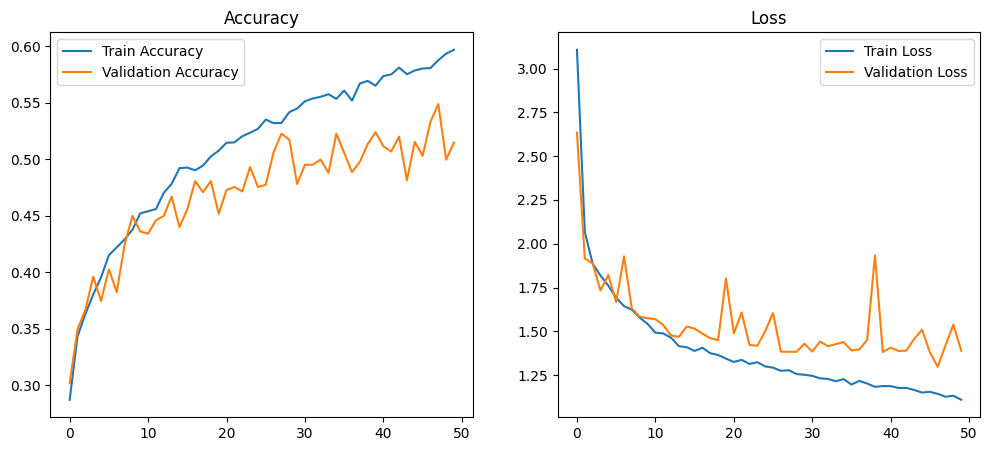

In [24]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [25]:
# Evaluate on the test set; display suitable metrics
# Load the Trained Model

from tensorflow.keras.models import load_model

# Load the best saved model
model = load_model("Waste-Classification-CNN-Model.h5")

# Display the model architecture again to verify loading
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 74, 74, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 36, 36, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 17, 17, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,986,793 (72.43 MB)

 Trainable params: 18,986,439 (72.43 MB)

 Non-trainable params: 352 (1.38 KB)

 Optimizer params: 2 (12.00 B)

In [26]:
# Evaluate model accuracy on test set
test_loss, test_accuracy = model.evaluate(validation_generator)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.5388 - loss: 1.3222
Test Accuracy: 51.67%
Test Loss: 1.4006


## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [27]:
# Create a function to augment the images




In [28]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [29]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

In [ ]:
With larger batch size accuracy drops.
Epoch number helps in achieving optimal accuracy, but increased epoch is effecting validation accuracy in reverse order.
Regularization callbacks techniques like EarlyStopping help reduce overfitting by stopping model traning when it reaches optimal accuracy.